<a href="https://colab.research.google.com/github/osaldealwis/CM2604CW/blob/main/CM2604CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CM2604 CW**
#V.O.V De Alwis
#RGU - 2330972
#IIT - 20232312

#Dataset Preparation

Uploading the Dataset

In [2]:
from google.colab import files
uploaded = files.upload()


Saving bank-full.csv to bank-full.csv


Loading and exploring the dataset

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Loading the dataset
data = pd.read_csv('bank-full.csv', sep=';')


In [5]:
#Exploring the dataset

# Display the first few rows
print(data.head())

# Checking dataset info
print(data.info())

# Checking for missing values
print(data.isnull().sum())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

Understanding the data

y
no     39922
yes     5289
Name: count, dtype: int64


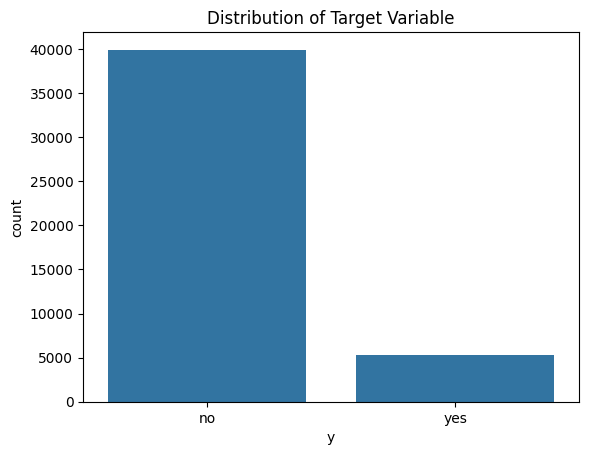

In [6]:
#Inspecting the target variable (y)
print(data['y'].value_counts())
sns.countplot(data=data, x='y')
plt.title('Distribution of Target Variable')
plt.show()


Data Preprocessing

In [7]:
# Encoding target: 'yes' to 1, 'no' to 0
# Converting the target variable (y) into binary values
data['y'] = data['y'].map({'yes': 1, 'no': 0})


In [8]:
# Checking categorical and numerical features
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')
Numerical Columns: Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')


In [9]:
# Encoding Categorical Features
# One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(data.head())


   age  balance  day  duration  campaign  pdays  previous  y  job_blue-collar  \
0   58     2143    5       261         1     -1         0  0            False   
1   44       29    5       151         1     -1         0  0            False   
2   33        2    5        76         1     -1         0  0            False   
3   47     1506    5        92         1     -1         0  0             True   
4   33        1    5       198         1     -1         0  0            False   

   job_entrepreneur  ...  month_jul  month_jun  month_mar  month_may  \
0             False  ...      False      False      False       True   
1             False  ...      False      False      False       True   
2              True  ...      False      False      False       True   
3             False  ...      False      False      False       True   
4             False  ...      False      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0      F

In [10]:
# Splitting into features and target
X = data.drop('y', axis=1)
y = data['y']

In [11]:
# Scaling numerical features for Neural Network
scaler = StandardScaler()
X_scaled = X.copy()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_scaled[numerical_cols] = scaler.fit_transform(X_scaled[numerical_cols])

Data Splitting

In [12]:
# Splitting data into train-test sets for Random Forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
# Splitting data into train-test sets for Neural Network (scaled features)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Verifying shapes
print("Random Forest Dataset:")
print("Training set size (RF):", X_train_rf.shape, "Test set size (RF):", X_test_rf.shape)
print("Neural Network Dataset:")
print("Training set size (NN):", X_train_nn.shape, "Test set size (NN):", X_test_nn.shape)

Random Forest Dataset:
Training set size (RF): (36168, 42) Test set size (RF): (9043, 42)
Neural Network Dataset:
Training set size (NN): (36168, 42) Test set size (NN): (9043, 42)


In [15]:
# Saving the processed datasets for Random Forest and Neural Network
X_train_rf.to_csv('X_train_rf.csv', index=False)
X_test_rf.to_csv('X_test_rf.csv', index=False)
y_train_rf.to_csv('y_train_rf.csv', index=False)
y_test_rf.to_csv('y_test_rf.csv', index=False)

X_train_nn.to_csv('X_train_nn.csv', index=False)
X_test_nn.to_csv('X_test_nn.csv', index=False)
y_train_nn.to_csv('y_train_nn.csv', index=False)
y_test_nn.to_csv('y_test_nn.csv', index=False)

In [16]:
# Downloading the datasets
from google.colab import files
files.download('X_train_rf.csv')
files.download('X_test_rf.csv')
files.download('y_train_rf.csv')
files.download('y_test_rf.csv')

files.download('X_train_nn.csv')
files.download('X_test_nn.csv')
files.download('y_train_nn.csv')
files.download('y_test_nn.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Model Implementation

**Random Forest Classification**

In [17]:

# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

# Reloading the preprocessed dataset
import pandas as pd
X_train_rf = pd.read_csv('X_train_rf.csv')
X_test_rf = pd.read_csv('X_test_rf.csv')
y_train_rf = pd.read_csv('y_train_rf.csv').squeeze()  # Converting to Series
y_test_rf = pd.read_csv('y_test_rf.csv').squeeze()    # Converting to Series

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_rf, y_train_rf = smote.fit_resample(X_train_rf, y_train_rf)

# Initializing the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', None]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_rf, y_train_rf)

# Choosing the Best hyperparameters
print(f"Best hyperparameters: {grid_search.best_params_}")
rf_model = grid_search.best_estimator_

# Training the Random Forest model with best parameters
rf_model.fit(X_train_rf, y_train_rf)
print("Random Forest model training complete.")

# Testing and evaluation
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:, 1]  # For ROC-AUC

# Evaluation metrics
print("\nRandom Forest Classification Report:")
print(classification_report(y_test_rf, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_rf, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_rf, y_prob_rf))



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best hyperparameters: {'class_weight': None, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest model training complete.

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7985
           1       0.58      0.56      0.57      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.75      0.76      9043
weighted avg       0.90      0.90      0.90      9043

Accuracy: 0.9009178370009953
ROC-AUC: 0.9235823785855567


**Neaural** **Network**

In [18]:
# Importong necessary libraries
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Reloading the preprocessed dataset
X_train_nn = pd.read_csv('X_train_nn.csv')
X_test_nn = pd.read_csv('X_test_nn.csv')
y_train_nn = pd.read_csv('y_train_nn.csv').squeeze()  # Target labels for training
y_test_nn = pd.read_csv('y_test_nn.csv').squeeze()    # Target labels for testing

# Handling class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_nn, y_train_nn = smote.fit_resample(X_train_nn, y_train_nn)

# Calculating class weights
import numpy as np
class_weights = compute_class_weight('balanced', classes=np.array([0, 1]), y=y_train_nn)
class_weights = {0: class_weights[0], 1: class_weights[1]}

# Building the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train_nn.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Training the model with validation
history = model.fit(X_train_nn, y_train_nn,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    class_weight=class_weights,
                    verbose=1)

# Evaluating the model on test data
y_pred_nn = model.predict(X_test_nn).flatten()
y_pred_labels_nn = (y_pred_nn > 0.5).astype(int)

print("Classification Report (Neural Network):")
print(classification_report(y_test_nn, y_pred_labels_nn))
print("Accuracy (Neural Network):", accuracy_score(y_test_nn, y_pred_labels_nn))

roc_auc = roc_auc_score(y_test_nn, y_pred_nn)     # ROC-AUC score
print(f"ROC-AUC: {roc_auc}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

Epoch 1/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7945 - loss: 0.5873 - val_accuracy: 0.8671 - val_loss: 0.4377
Epoch 2/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8554 - loss: 0.4015 - val_accuracy: 0.8743 - val_loss: 0.3915
Epoch 3/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8640 - loss: 0.3547 - val_accuracy: 0.8991 - val_loss: 0.3249
Epoch 4/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8725 - loss: 0.3262 - val_accuracy: 0.8991 - val_loss: 0.3129
Epoch 5/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8741 - loss: 0.3189 - val_accuracy: 0.9203 - val_loss: 0.2981
Epoch 6/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8762 - loss: 0.3141 - val_accuracy: 0.9179 - val_loss: 0.2906
Epoch 7/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8779 - loss: 0.3099 - val_accuracy: 0.9126 - val_loss: 0.2942
Epoch 8/50
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8772 - loss: 0.3158 - 

#Model Evaluation

Checking for Overfitting

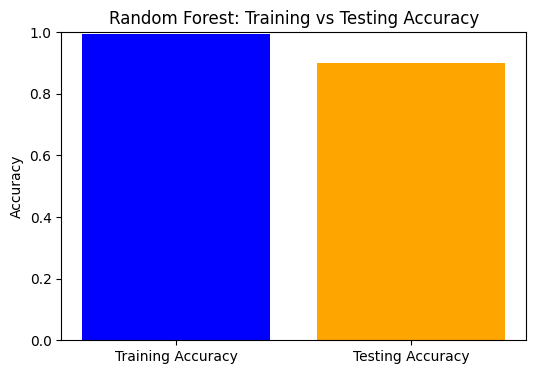

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


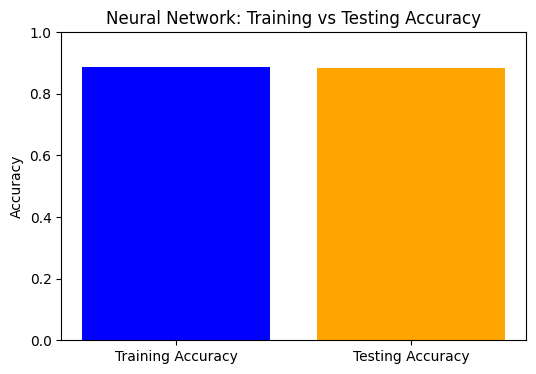

In [19]:
from sklearn.metrics import accuracy_score

# For Random Forest
# Calculating training accuracy
y_train_pred_rf = rf_model.predict(X_train_rf)
train_accuracy_rf = accuracy_score(y_train_rf, y_train_pred_rf)

# Calculating testing accuracy
y_test_pred_rf = rf_model.predict(X_test_rf)
test_accuracy_rf = accuracy_score(y_test_rf, y_test_pred_rf)

# Plotting training vs testing accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy_rf, test_accuracy_rf], color=['blue', 'orange'])
plt.title("Random Forest: Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

# For Neural Network
# Calculating training accuracy (last epoch from history)
training_accuracy_nn = history.history['accuracy'][-1]

# Calculating testing accuracy
y_pred_labels_nn = (model.predict(X_test_nn) > 0.5).astype(int).flatten()
testing_accuracy_nn = accuracy_score(y_test_nn, y_pred_labels_nn)

# Plotting training vs testing accuracy
plt.figure(figsize=(6, 4))
plt.bar(['Training Accuracy', 'Testing Accuracy'], [training_accuracy_nn, testing_accuracy_nn], color=['blue', 'orange'])
plt.title("Neural Network: Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


Comparing Model performance

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
      Metric  Random Forest  Neural Network
0   Accuracy       0.900918        0.885436
1  Precision       0.579102        0.506989
2     Recall       0.560491        0.754253
3   F1-Score       0.569645        0.606383
4    ROC-AUC       0.923582        0.919630


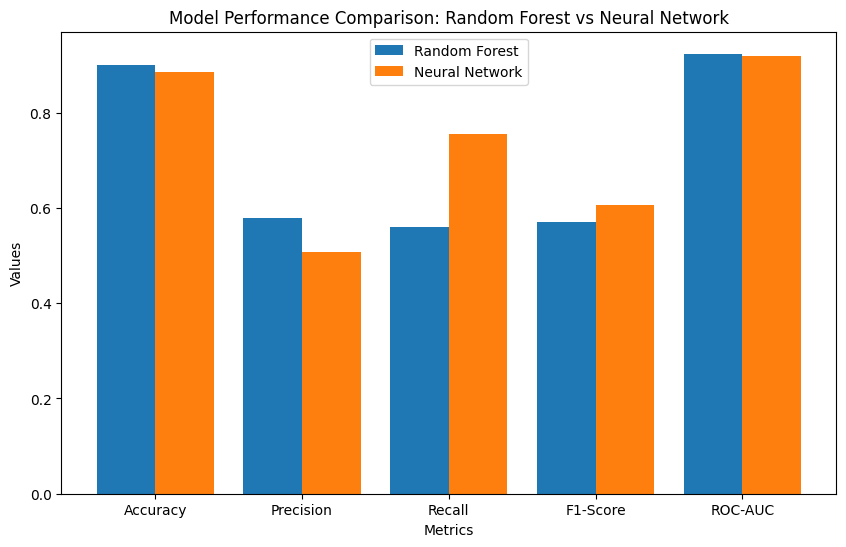

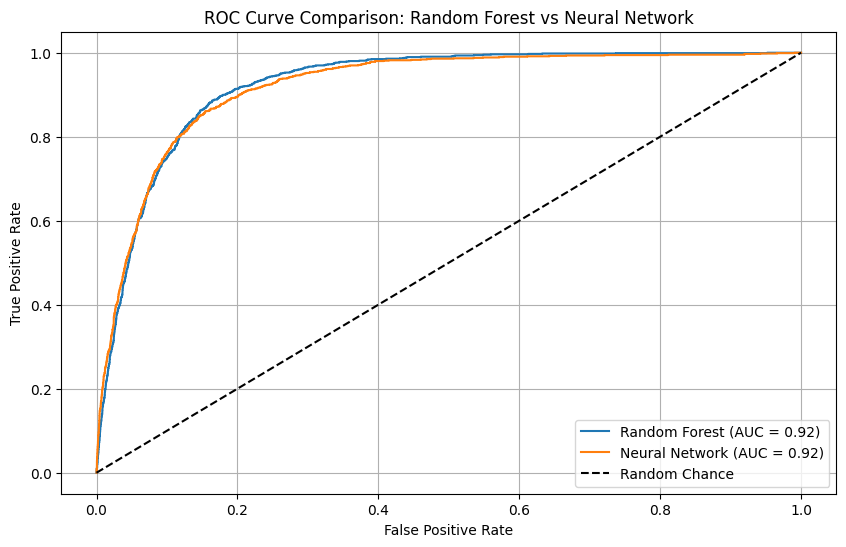

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import pandas as pd

# Random Forest predictions
y_pred_rf = rf_model.predict(X_test_rf)
y_prob_rf = rf_model.predict_proba(X_test_rf)[:, 1]  # For ROC-AUC

# Neural Network predictions
y_pred_nn = model.predict(X_test_nn).flatten()  # Probabilities
y_pred_labels_nn = (y_pred_nn > 0.5).astype(int)  # Converting to binary labels (0 or 1)

# Collecting evaluation metrics for Random Forest
rf_report = classification_report(y_test_rf, y_pred_rf, output_dict=True)
rf_accuracy = accuracy_score(y_test_rf, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test_rf, y_prob_rf)

# Collecting evaluation metrics for Neural Network
nn_report = classification_report(y_test_nn, y_pred_labels_nn, output_dict=True)
nn_accuracy = accuracy_score(y_test_nn, y_pred_labels_nn)
nn_roc_auc = roc_auc_score(y_test_nn, y_pred_nn)

# Creating a DataFrame for comparison
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Random Forest': [
        rf_accuracy,
        rf_report['1']['precision'],
        rf_report['1']['recall'],
        rf_report['1']['f1-score'],
        rf_roc_auc
    ],
    'Neural Network': [
        nn_accuracy,
        nn_report['1']['precision'],
        nn_report['1']['recall'],
        nn_report['1']['f1-score'],
        nn_roc_auc
    ]
}

comparison_df = pd.DataFrame(metrics)

# Printing the table for model comparison
print(comparison_df)

# Bar Plot for Metrics Comparison
plt.figure(figsize=(10, 6))
x = range(len(metrics['Metric']))
plt.bar(x, comparison_df['Random Forest'], width=0.4, label='Random Forest', align='center')
plt.bar([p + 0.4 for p in x], comparison_df['Neural Network'], width=0.4, label='Neural Network', align='center')
plt.xticks([p + 0.2 for p in x], metrics['Metric'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Comparison: Random Forest vs Neural Network')
plt.legend()
plt.show()

# ROC Curve for Both Models
rf_fpr, rf_tpr, _ = roc_curve(y_test_rf, y_prob_rf)
nn_fpr, nn_tpr, _ = roc_curve(y_test_nn, y_pred_nn)

plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_roc_auc))
plt.plot(nn_fpr, nn_tpr, label='Neural Network (AUC = {:.2f})'.format(nn_roc_auc))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Random Forest vs Neural Network')
plt.legend()
plt.grid()
plt.show()

